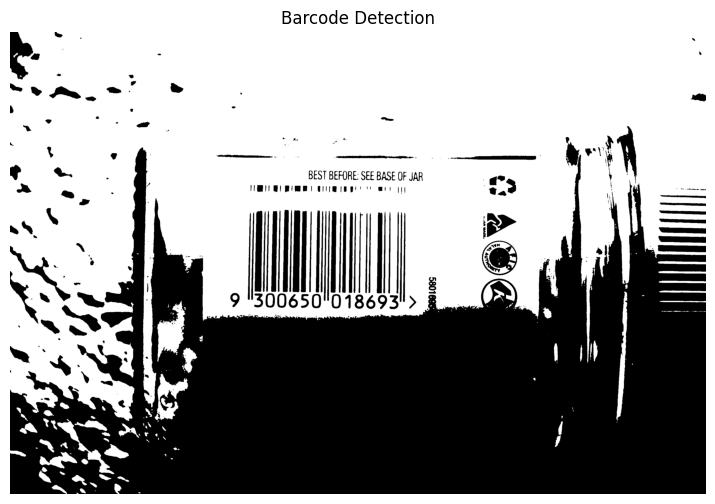

0.55
11 20
0.631578947368421
12 19
0.5697674418604651
49 86
0.7111111111111111
32 45
0.36666666666666664
22 60
0.6451612903225806
40 62
0.4603174603174603
29 63
0.6461538461538462
42 65
0.6507936507936508
41 63
0.3968253968253968
25 63
0.6153846153846154
40 65
0.6307692307692307
41 65
0.5555555555555556
35 63
0.6507936507936508
41 63
0.6461538461538462
42 65
0.6461538461538462
42 65
0.6349206349206349
40 63
0.6212121212121212
41 66
0.640625
41 64
0.36363636363636365
12 33
0.7027027027027027
26 37
0.375
18 48
0.7058823529411765
12 17
0.7741935483870968
24 31
0.3829787234042553
18 47
0.5
22 44
0.5853658536585366
24 41
0.4318181818181818
19 44
0.4418604651162791
19 43
0.5384615384615384
21 39
0.5111111111111111
23 45
0.45454545454545453
20 44
0.5526315789473685
21 38
0.5
22 44
0.5909090909090909
26 44
0.45652173913043476
21 46
0.5
22 44
0.5
22 44
0.5238095238095238
22 42
0.7727272727272727
34 44
0.4772727272727273
21 44
0.4583333333333333
11 24
0.6785714285714286
19 28
Text file saved at:

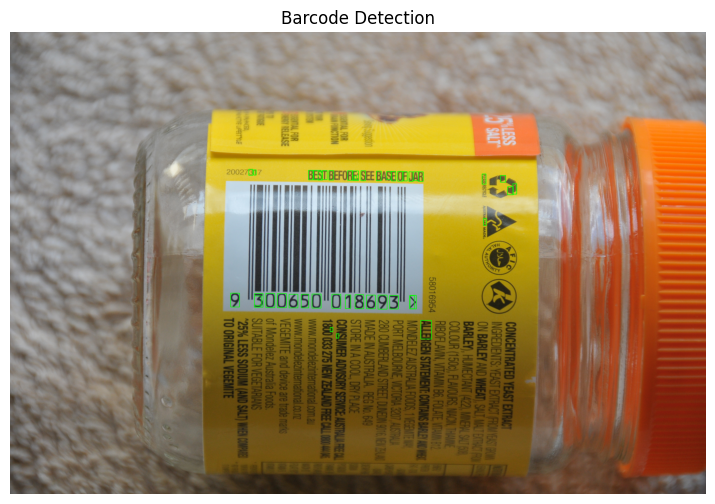

In [96]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.


# Author: [Your Name]
# Last Modified: 2024-09-09


"""
Input: Colored Image
1. Convert to grayscale
2. Detect edges
Output:
a) Text file containing x1, y1, x2, y2, x3, y3, x4, y4 (corner coordinates of bounding boxes)
b) Image with bounding boxes drawn around detected barcodes
"""

import os
import cv2
import matplotlib.pyplot as plt


def save_output(output_path, content, output_type="txt"):
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    if output_type == "txt":
        with open(output_path, "w") as f:
            f.write(content)
        print(f"Text file saved at: {output_path}")
    elif output_type == "image":
        cv2.imwrite(output_path, content)
        print(f"Image saved at: {output_path}")
    else:
        print("Unsupported output type. Use 'txt' or 'image'.")


def run_task1(image_path, config):

    # Step 1: Load the image and convert to grayscale
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),100)
    _,binary =  cv2.threshold(blur,10,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    show(binary)
    # Step 2: Apply edge detection (Canny)
    edges = cv2.Canny(blur, 50, 150)

    # Step 3: Find contours from the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bounding_boxes = []

    # Step 4: Loop over the contours and find bounding boxes
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        
        if aspect_ratio>0.33 and  aspect_ratio<0.8 and w>10 and h>10 :
            print(aspect_ratio)
            print(w,h)
        # Filter based on the aspect ratio (barcodes are generally wide)
            # Draw a green bounding box around the detected barcode
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Get the four corners of the bounding box
            x1, y1 = x, y
            x2, y2 = x + w, y
            x3, y3 = x + w, y + h
            x4, y4 = x, y + h
            bounding_boxes.append(f"{x1}, {y1}, {x2}, {y2}, {x3}, {y3}, {x4}, {y4}\n")

    # Step 5: Save the bounding box coordinates to a text file
    bounding_boxes_content = ''.join(bounding_boxes)
    output_path_txt = "output/task1/result.txt"
    save_output(output_path_txt, bounding_boxes_content, output_type="txt")

    # Step 6: Save the image with bounding boxes
    output_path_img = "output/task1/result_with_boxes.png"
    save_output(output_path_img, img, output_type="image")

    # Step 7: Display the image with bounding boxes
    show(img)


def show(image):
    # Convert BGR image (used by OpenCV) to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the result using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(image_rgb)
    plt.title("Barcode Detection")
    plt.axis("off")  # Hide axes for better visualization
    plt.show()


# Example usage
run_task1("../validation/test/task1/img5.jpg", "")

# If you have a directory with multiple images, you can uncomment this function
# def main():
#     directory = os.fsencode("../validation/test/task1")
#     for file in os.listdir(directory):
#         filename = os.fsdecode(file)
#         run_task1(filename, "")
